### Project: Campaign for selling personal loans to them

This case is about a bank (Thera Bank) which has a growing customer base. Majority of these customers are liability customers (depositors) with varying size of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget.

The department wants to build a model that will help them identify the potential customers who have higher probability of purchasing the loan. This will increase the success ratio while at the same time reduce the cost of the campaign.

The file Bank.xls contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

In [231]:
# Importing Libraries
import numpy as np # Linear Algebra
import pandas as pd # Data processing
import seaborn as sns # Data Visualization
from matplotlib import pyplot as plt # Data Visualization
import scipy.stats as stats # Data computing

#### 1.Read the column description and ensure you understand each attribute well

In [232]:
# Read the dataset
Cust_Df = pd.read_csv('Bank_Personal_Loan_Modelling-1.csv', sep=',') 
Cust_Df.columns = Cust_Df.columns.str.replace(' ', '')
Cust_Df.head(10)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [233]:
# Checking shape, data type and missing value
Cust_Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 5000 non-null   int64  
 1   Age                5000 non-null   int64  
 2   Experience         5000 non-null   int64  
 3   Income             5000 non-null   int64  
 4   ZIPCode            5000 non-null   int64  
 5   Family             5000 non-null   int64  
 6   CCAvg              5000 non-null   float64
 7   Education          5000 non-null   int64  
 8   Mortgage           5000 non-null   int64  
 9   PersonalLoan       5000 non-null   int64  
 10  SecuritiesAccount  5000 non-null   int64  
 11  CDAccount          5000 non-null   int64  
 12  Online             5000 non-null   int64  
 13  CreditCard         5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [234]:
#finding unique data
Cust_Df.apply(lambda x: len(x.unique()))

ID                   5000
Age                    45
Experience             47
Income                162
ZIPCode               467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
PersonalLoan            2
SecuritiesAccount       2
CDAccount               2
Online                  2
CreditCard              2
dtype: int64

In [235]:
#find minimum, maximum, average, standard deviation as well as quantile values with respect to each numeric column
Cust_Df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
PersonalLoan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


#### Inference: 
 - Data has 14 columns with 5000 customer informatiom in numerical data type. Categorical information is also in numerical form.
 - Customer age and professional experience is uniformly distributed with income, credit spending right skewed distribution.
 - Customer with house mortgage is highly right skewed with most with no house as mortgage.
 - Data has customer with experience mentioned as negative which needs to be checked.
 - Zip code has an outlier with value as 9307 which could be data input error.

#### Here we will treat the data issues without dropping any row as data is valuable

In [236]:
Cust_Df[Cust_Df['Experience'] < 0]

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
89,90,25,-1,113,94303,4,2.30,3,0,0,0,0,0,1
226,227,24,-1,39,94085,2,1.70,2,0,0,0,0,0,0
315,316,24,-2,51,90630,3,0.30,3,0,0,0,0,1,0
451,452,28,-2,48,94132,2,1.75,3,89,0,0,0,1,0
524,525,24,-1,75,93014,4,0.20,1,0,0,0,0,1,0
536,537,25,-1,43,92173,3,2.40,2,176,0,0,0,1,0
540,541,25,-1,109,94010,4,2.30,3,314,0,0,0,1,0
576,577,25,-1,48,92870,3,0.30,3,0,0,0,0,0,1
583,584,24,-1,38,95045,2,1.70,2,0,0,0,0,1,0
597,598,24,-2,125,92835,2,7.20,1,0,0,1,0,0,1


#### Inference: 
 - Above data shows these customers have non-zero income with also non-zero credit spending. Hence we can assume that the experience of these customer are not captured correctly. Hence we need to treat the negative experience value.
 - Experience and Age should be correlated which we can validate and if so we can replace negative value with their mean value of the corresponding age group.

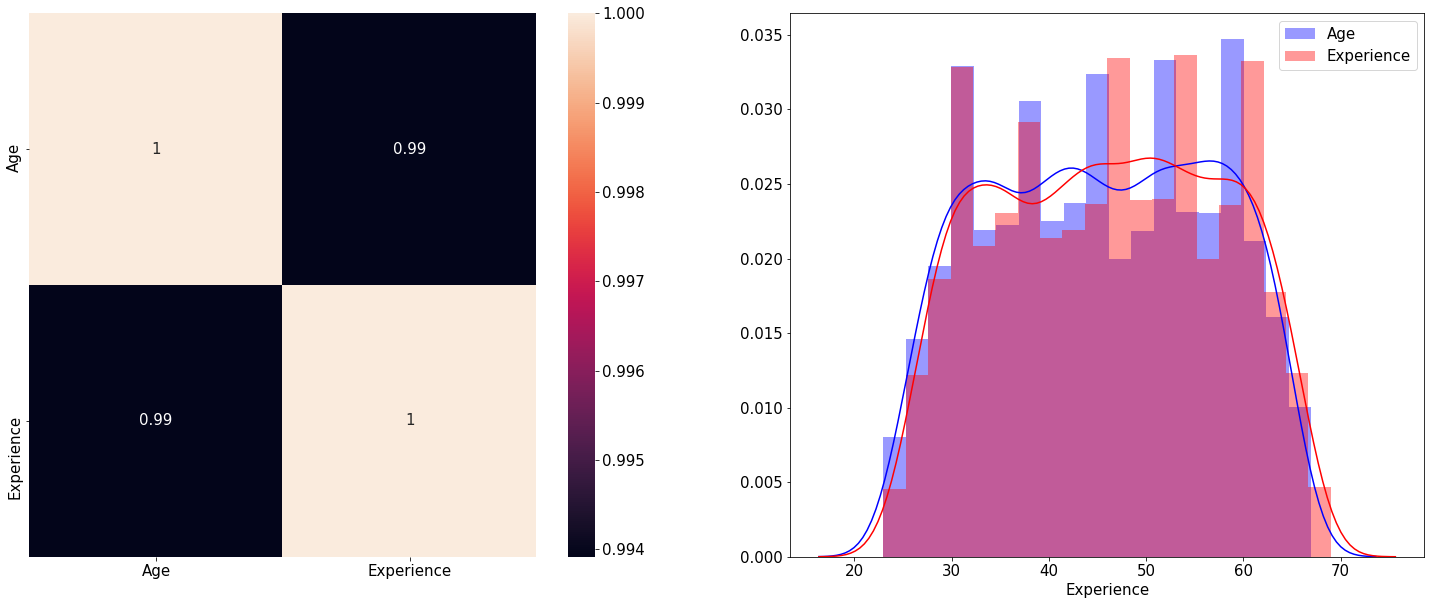

In [237]:
PData_Df = Cust_Df[Cust_Df['Experience'] > 0]
PData_Df = PData_Df[['Age', 'Experience']]
plt.figure(figsize=(25,10))
plt.subplot(1,2,1)
sns.heatmap(PData_Df.corr(),annot=True) # to validate correlation between age and experience
plt.subplot(1,2,2)
sns.distplot( Cust_Df["Age"], color="blue", label="Age")
sns.distplot( Cust_Df["Experience"] +26 , color="red", label="Experience")
plt.legend()


#### Inference:
- Age and Experience is highly correlated and experience starts with 25yrs of Age

In [238]:
NData_Df = Cust_Df[Cust_Df['Experience'] < 0]
nage = NData_Df['Age'].unique() #Unique Age group with negative value for data preprocessing

Cust_Df['Experience'].replace( to_replace= -1,value = np.nan,inplace = True )
Cust_Df['Experience'].replace( to_replace= -2,value = np.nan,inplace = True )
Cust_Df['Experience'].replace( to_replace= -3,value = np.nan,inplace = True )# Replace all -ve value with NaN

#Replace NaN experience field with median experience
for i in nage:
    mask1 = (Cust_Df.Experience.isnull()) & (Cust_Df.Age == i)
    Data_Df = Cust_Df[Cust_Df.Age == i]
    Cust_Df.loc[mask1, 'Experience'] = Cust_Df.loc[mask1, 'Experience'].apply(lambda x: Data_Df[['Experience']].median())
Cust_Df['Experience'].replace( to_replace= np.nan,value = 0,inplace = True ) #replace with zero for left over NaN values

In [239]:
Cust_Df[Cust_Df['ZIPCode'] < 90000] # Getting the row and column with ZIP code as 9307

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
384,385,51,25.0,21,9307,4,0.6,3,0,0,0,0,1,1


In [240]:
Cust_Df.iloc[384,4] = 93437 #Replacing with median value 

In [241]:
Cust_Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 5000 non-null   int64  
 1   Age                5000 non-null   int64  
 2   Experience         5000 non-null   float64
 3   Income             5000 non-null   int64  
 4   ZIPCode            5000 non-null   int64  
 5   Family             5000 non-null   int64  
 6   CCAvg              5000 non-null   float64
 7   Education          5000 non-null   int64  
 8   Mortgage           5000 non-null   int64  
 9   PersonalLoan       5000 non-null   int64  
 10  SecuritiesAccount  5000 non-null   int64  
 11  CDAccount          5000 non-null   int64  
 12  Online             5000 non-null   int64  
 13  CreditCard         5000 non-null   int64  
dtypes: float64(2), int64(12)
memory usage: 547.0 KB


In [242]:
Cust_Df = Cust_Df.drop('ID',axis=1) #ID column has no relevance for our analysis as of now
Cust_Df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.126400,11.429180,0.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
ZIPCode,5000.0,93169.329000,1759.458676,90005.0,91911.0,93437.0,94608.0,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
PersonalLoan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
SecuritiesAccount,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0


#### 2.Study the data distribution in each attribute, share your findings. 

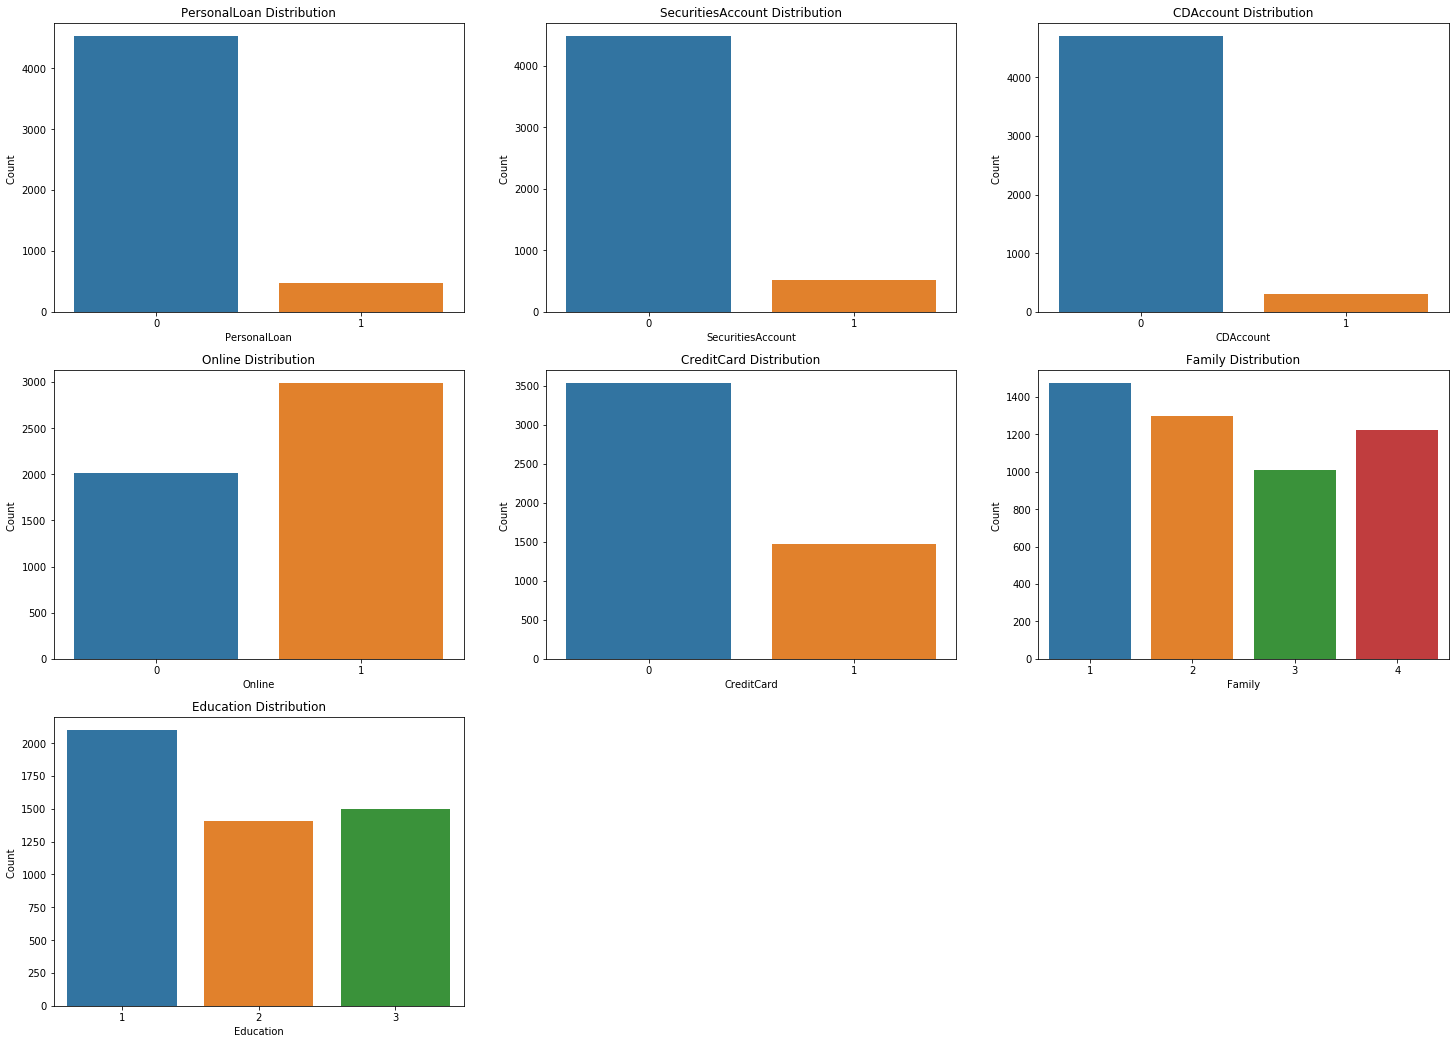

In [245]:
# Univariate Analysis
# Categolical columns are 'PersonalLoan', 'SecuritiesAccount','CDAccount','Online','CreditCard'. 
# Family Size and Education to be included to understand distribution
plt.figure(figsize=(25,50))
plt.rcParams.update({'font.size': 10})
plt.subplot(8,3,1)
sns.barplot(Cust_Df['PersonalLoan'].value_counts().index, Cust_Df['PersonalLoan'].value_counts().values)
plt.xlabel('PersonalLoan')
plt.ylabel('Count ')
plt.title('PersonalLoan Distribution')
plt.subplot(8,3,2)
sns.barplot(Cust_Df['SecuritiesAccount'].value_counts().index, Cust_Df['SecuritiesAccount'].value_counts().values)
plt.xlabel('SecuritiesAccount')
plt.ylabel('Count ')
plt.title('SecuritiesAccount Distribution')
plt.subplot(8,3,3)
sns.barplot(Cust_Df['CDAccount'].value_counts().index, Cust_Df['CDAccount'].value_counts().values)
plt.xlabel('CDAccount')
plt.ylabel('Count ')
plt.title('CDAccount Distribution')
plt.subplot(8,3,4)
sns.barplot(Cust_Df['Online'].value_counts().index, Cust_Df['Online'].value_counts().values)
plt.xlabel('Online')
plt.ylabel('Count ')
plt.title('Online Distribution')
plt.subplot(8,3,5)
sns.barplot(Cust_Df['CreditCard'].value_counts().index, Cust_Df['CreditCard'].value_counts().values)
plt.xlabel('CreditCard')
plt.ylabel('Count ')
plt.title('CreditCard Distribution')
plt.subplot(8,3,6)
sns.barplot(Cust_Df['Family'].value_counts().index, Cust_Df['Family'].value_counts().values)
plt.xlabel('Family')
plt.ylabel('Count ')
plt.title('Family Distribution')
plt.subplot(8,3,7)
sns.barplot(Cust_Df['Education'].value_counts().index, Cust_Df['Education'].value_counts().values)
plt.xlabel('Education')
plt.ylabel('Count ')
plt.title('Education Distribution')
plt.show()

#### Inference:
- We have very few data of customers who has taken personal loan compared to other customers.
- Customers with Security Account, CD Account, Credit Card is less
- Customer with least family size is highest in the sample
- We have customer base with almost uniform distribution wrto education. 58% are graduate and advanced professional.

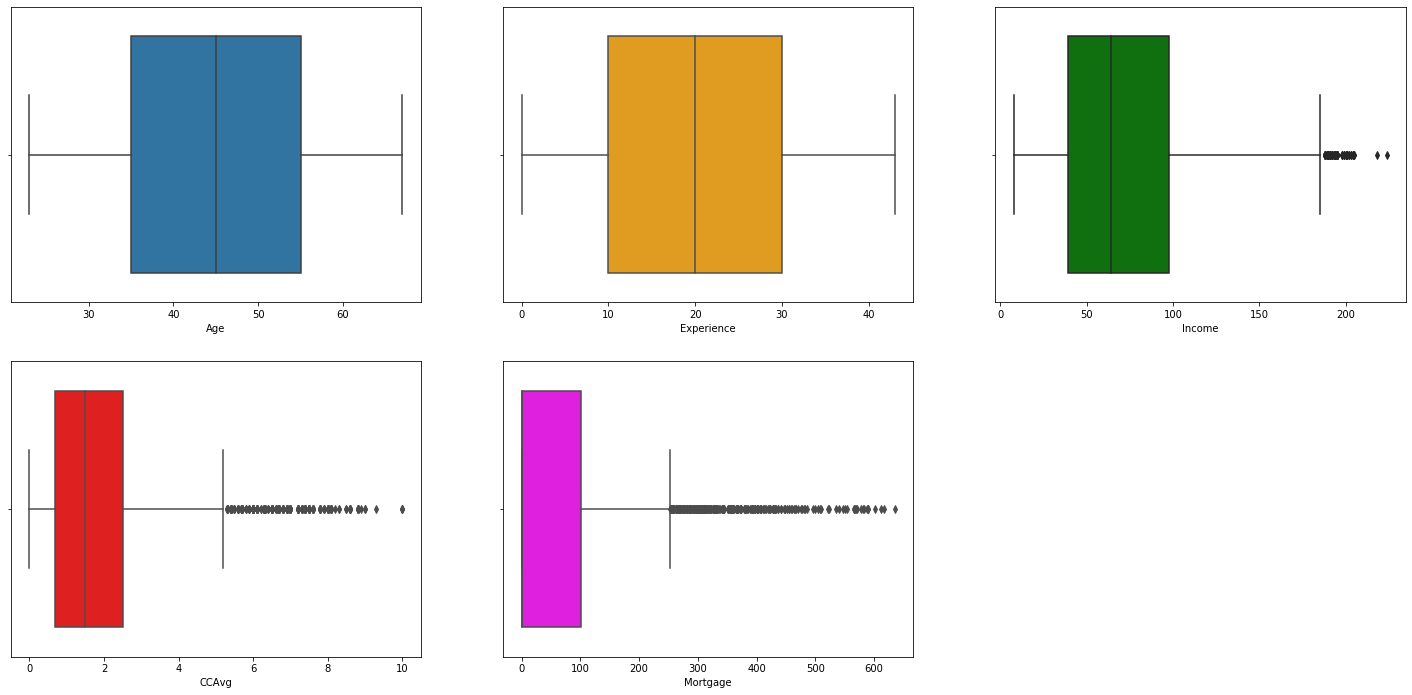

In [246]:
# Customer Characteristics are ''Age','Experience','Income','CCAvg'. 
plt.figure(figsize=(25,25))
plt.subplot(4,3,1)
sns.boxplot(x = Cust_Df.Age)
plt.xlabel('Age')
plt.subplot(4,3,2)
sns.boxplot(x = Cust_Df.Experience,color='orange')
plt.xlabel('Experience')
plt.subplot(4,3,3)
sns.boxplot(x = Cust_Df.Income,color='green')
plt.xlabel('Income')
plt.subplot(4,3,4)
sns.boxplot(x = Cust_Df.CCAvg,color='red')
plt.xlabel('CCAvg')
plt.subplot(4,3,5)
sns.boxplot(x = Cust_Df.Mortgage,color='magenta')
plt.xlabel('Mortgage')
plt.show()

#### Inference:
- Age and Experience is uniformly distributed as well as highly correlated.
- Income and Credit spending is right skewed and also slightly correlated.
- Mortgage house value is highly right skewed indicating few people with house mortgage

In [247]:
#Treating outliers in Mortgage
from scipy import stats
Cust_Df['Scaled_Mortgage'] = np.abs(stats.zscore(Cust_Df['Mortgage']))
Cust_Df=Cust_Df[Cust_Df['Scaled_Mortgage']<3]
Cust_Df.drop('Scaled_Mortgage',axis =1, inplace = True)
Cust_Df.shape

(4895, 13)

##### Outliers affects the distribution and eventually affects model building. Above treatment have removed 202 data rows

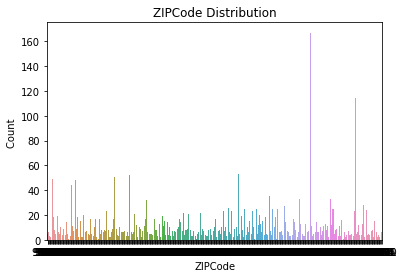

In [248]:
sns.barplot(Cust_Df['ZIPCode'].value_counts().index, Cust_Df['ZIPCode'].value_counts().values)
plt.xlabel('ZIPCode')
plt.ylabel('Count ')
plt.title('ZIPCode Distribution')
plt.show()

#### Inference:
- ZIPcode distribution is uniform indicates customers are uniformly distributed across various areas with very few peaks from some area and hence not relevant for our model as of now

In [249]:
Cust_Df.drop('ZIPCode',axis =1, inplace = True)
Cust_Df.shape

(4895, 12)

#### 3.Get the target column distribution. Your comments

In [250]:
print ('Out of 4895 customer data,', Cust_Df[Cust_Df.PersonalLoan == 1].shape[0], '(%1.1f percent) customers had taken personal loan from the bank' %(Cust_Df['PersonalLoan'].value_counts(1)*100).values[1])

Out of 4895 customer data, 433 (8.8 percent) customers had taken personal loan from the bank


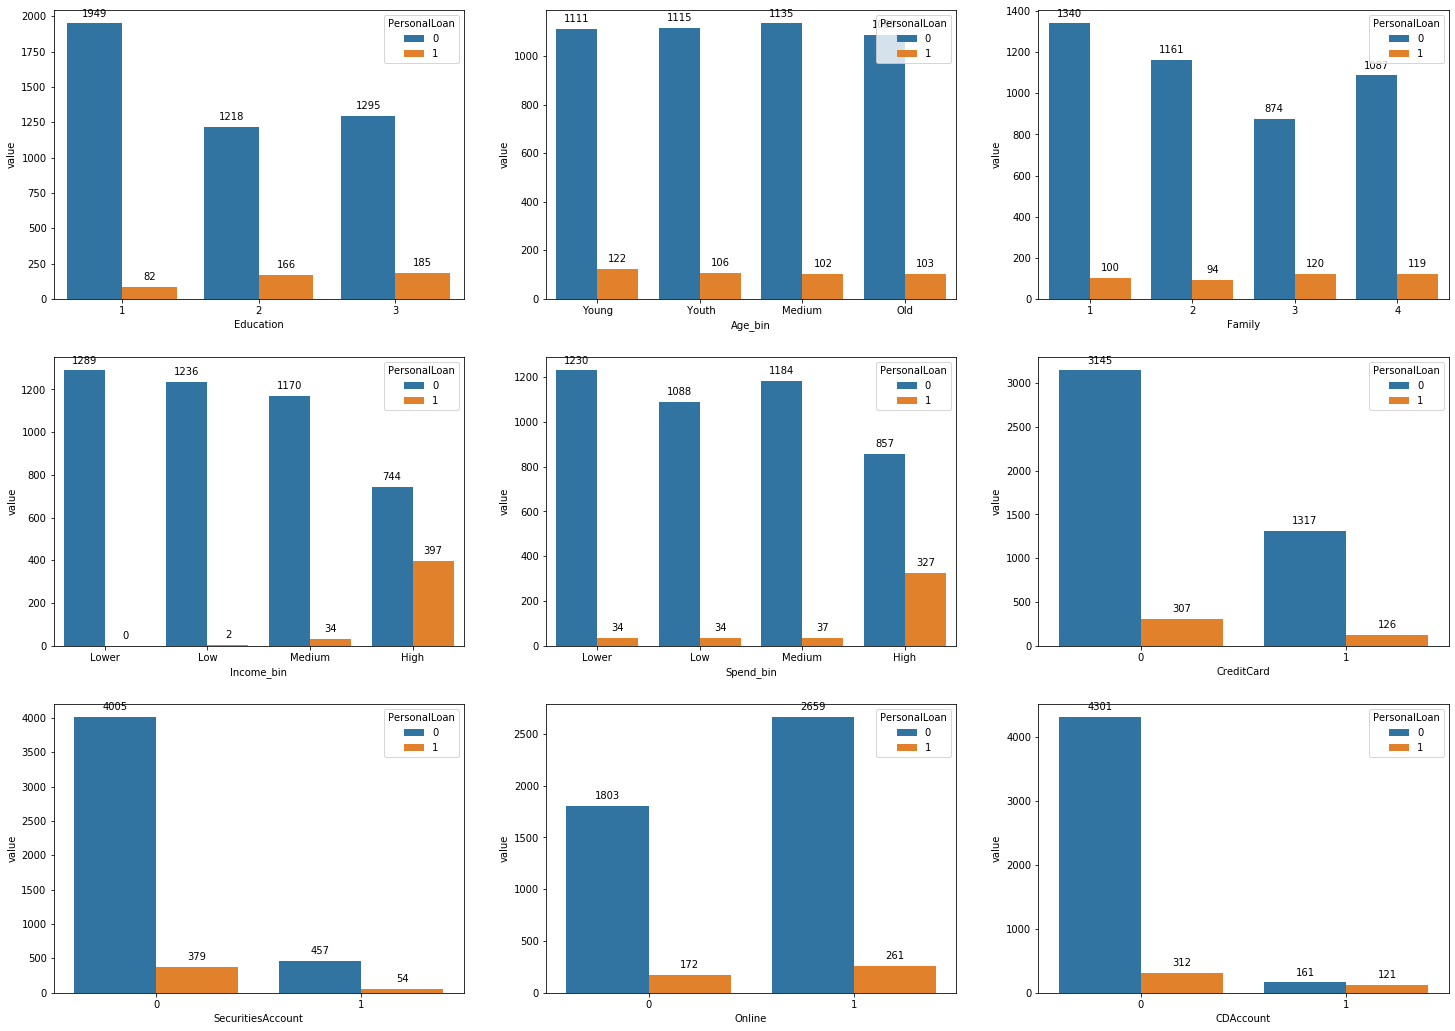

In [251]:
#Bivariate analysis
# Blue Bar indicates the target customer base who has not taken personal loan, Orange bar indicates customer who has taken loan.
# Below bar plot help visualize Orange customer features and likelyhood of available customer base to target and make them avail loan.

import copy
Df = copy.deepcopy(Cust_Df)

plt.figure(figsize=(25,50))
plt.subplot(8,3,1) # Education
edu = pd.crosstab(Df['Education'],Df['PersonalLoan'])
stacked = edu.stack().reset_index().rename(columns={0:'value'})
splot = sns.barplot(x=stacked.Education, y=stacked.value, hue=stacked.PersonalLoan)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.subplot(8,3,2) # Age Note: Experience graph will be similiar as they are highly corelated with Age and hence not plotted.
bins = [23, 35, 45, 55, 67] #values from above dataframe description
group = ['Young', ' Youth','Medium', 'Old']
Df['Age_bin'] = pd.cut(Df['Age'],bins, labels = group)
age = pd.crosstab(Df['Age_bin'], Df['PersonalLoan'])
stacked = age.stack().reset_index().rename(columns={0:'value'})
splot = sns.barplot(x=stacked.Age_bin, y=stacked.value, hue=stacked.PersonalLoan)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.subplot(8,3,3) #Family Size
family = pd.crosstab(Df['Family'], Df['PersonalLoan'])
stacked = family.stack().reset_index().rename(columns={0:'value'})
splot = sns.barplot(x=stacked.Family, y=stacked.value, hue=stacked.PersonalLoan)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.subplot(8,3,4) #Income
bins = [8, 39, 64, 98, 224]
group = ['Lower', 'Low','Medium', 'High']
Df['Income_bin'] = pd.cut(Df['Income'],bins, labels = group)
income = pd.crosstab(Df['Income_bin'], Df['PersonalLoan'])
stacked = income.stack().reset_index().rename(columns={0:'value'})
splot = sns.barplot(x=stacked.Income_bin, y=stacked.value, hue=stacked.PersonalLoan)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.subplot(8,3,5) #Creditspend
bins = [0, 0.7, 1.5, 2.5, 10]
group = ['Lower', 'Low','Medium', 'High']
Df['Spend_bin'] = pd.cut(Df['CCAvg'],bins, labels = group)
spend = pd.crosstab(Df['Spend_bin'], Df['PersonalLoan'])
stacked = spend.stack().reset_index().rename(columns={0:'value'})
splot = sns.barplot(x=stacked.Spend_bin, y=stacked.value, hue=stacked.PersonalLoan)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.subplot(8,3,6) #Have Universal Credit Card
ccard = pd.crosstab(Df['CreditCard'], Df['PersonalLoan'])
stacked = ccard.stack().reset_index().rename(columns={0:'value'})
splot = sns.barplot(x=stacked.CreditCard, y=stacked.value, hue=stacked.PersonalLoan)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.subplot(8,3,7) #Have SecurityAccount
sacc = pd.crosstab(Df['SecuritiesAccount'], Df['PersonalLoan'])
stacked = sacc.stack().reset_index().rename(columns={0:'value'})
splot = sns.barplot(x=stacked.SecuritiesAccount, y=stacked.value, hue=stacked.PersonalLoan)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.subplot(8,3,8) #Use Online facilities
oline = pd.crosstab(Df['Online'], Df['PersonalLoan'])
stacked = oline.stack().reset_index().rename(columns={0:'value'})
splot = sns.barplot(x=stacked.Online, y=stacked.value, hue=stacked.PersonalLoan)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.subplot(8,3,9) #Have CD Account
cdacc = pd.crosstab(Df['CDAccount'], Df['PersonalLoan'])
stacked = cdacc.stack().reset_index().rename(columns={0:'value'})
splot = sns.barplot(x=stacked.CDAccount, y=stacked.value, hue=stacked.PersonalLoan)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')


plt.show()

Text(0.5, 1, 'Attribute correlation of customers not taken personal loan')

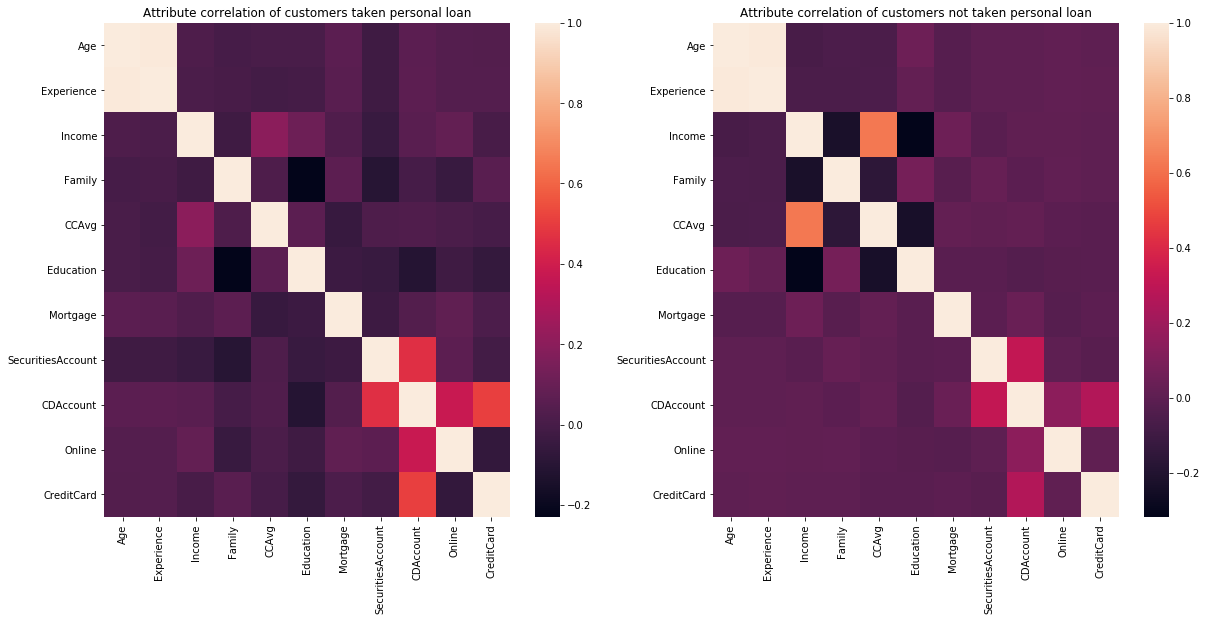

In [252]:
# Analyze Attribute correlation of customers who has taken personal loan and who has not
PCust = Cust_Df[Cust_Df.PersonalLoan == 1].drop('PersonalLoan', axis = 1).corr()
NCust = Cust_Df[Cust_Df.PersonalLoan == 0].drop('PersonalLoan', axis = 1).corr()
plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
sns.heatmap(PCust)
plt.title('Attribute correlation of customers taken personal loan')
plt.subplot(2,2,2)
sns.heatmap(NCust)
plt.title('Attribute correlation of customers not taken personal loan')

#### Inference:
- Lower Age/Experience group are likely to avail for personal loan.
- High income and high spending customers are likely to avail.
- Customer who dont have Security Account/ Deposit Account/ Universal credit card are likely to avail loan.
- Graduates and higher educated customers are more likely to avail loan.
- Customer using Online facility or not does not seem to have significant relationship with likelyhood to avail loan.

In [253]:
#Removal of Experience column to remove noice as we have correlated Age field for the same.
Cust_Df.drop('Experience',axis =1, inplace = True)
Cust_Df.shape

(4895, 11)

In [254]:
Cust_Df.groupby(Cust_Df['PersonalLoan']).mean() #Check distribution of features on target

,Age,Income,Family,CCAvg,Education,Mortgage,SecuritiesAccount,CDAccount,Online,CreditCard
PersonalLoan,,,,,,,,,,
0,45.379202,65.151502,2.382788,1.709283,1.853429,46.787539,0.102420,0.036082,0.595921,0.295159
1,44.965358,142.692841,2.595843,3.867252,2.237875,60.695150,0.124711,0.279446,0.602771,0.290993


#### 4.Split the data into training and test set in the ratio of 70:30 respectively

In [255]:
from sklearn.model_selection import train_test_split
Cust_Df_features = Cust_Df.drop('PersonalLoan', axis = 1)
Cust_Df_labels = Cust_Df["PersonalLoan"]
X = Cust_Df_features
y = Cust_Df_labels
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [256]:
print('Features included for the building the model:', *X.columns)

Features included for the building the model: Age Income Family CCAvg Education Mortgage SecuritiesAccount CDAccount Online CreditCard


In [257]:
print('Checking the shape of data post split:')
print('Feature data set:',X.shape)
print('Label data set:',y.shape)
print('Feature Training data set:',X_train.shape)
print('Label Training data set:',y_train.shape)
print('Feature Test data set:',X_test.shape)
print('Label Test data set:',y_test.shape)

Checking the shape of data post split:
Feature data set: (4895, 10)
Label data set: (4895,)
Feature Training data set: (3426, 10)
Label Training data set: (3426,)
Feature Test data set: (1469, 10)
Label Test data set: (1469,)


#### 5.Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a liability customer buying personal loans (15 points)

####  <U>KNN Classification Model:</U>

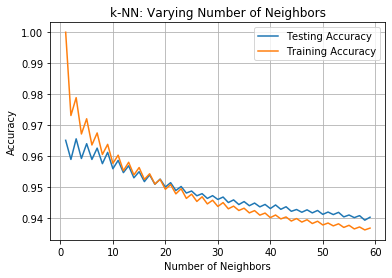

Best accuracy is 0.9656569094622192 with K = 3


In [224]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
neighbors = np.arange(1, 60)
train_accuracy = []
test_accuracy = []
train = []
test = []
# Loop over different values of k from 1 to 60
for i, k in enumerate(neighbors):
    train = []
    test = []
    for j in range(20): # for different value of random state
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=j)
        sc=StandardScaler()
        scaledX_train = sc.fit_transform(X_train)
        scaledX_test = sc.transform(X_test)
        knn = KNeighborsClassifier(n_neighbors=k)      
        knn.fit(scaledX_train,y_train)
        train.append(knn.score(scaledX_train,y_train))
        test.append(knn.score(scaledX_test,y_test))
    #Compute accuracy on the training set
    train_accuracy.append(np.mean(train))
    #Compute accuracy on the testing set
    test_accuracy.append(np.mean(test))
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.grid()
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()
print('\033[1mBest accuracy is {} with K = {}'.format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

In [258]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=1)
sc=StandardScaler()
scaledX_train = sc.fit_transform(X_train)
scaledX_test = sc.fit_transform(X_test)

In [259]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

knn = KNeighborsClassifier(n_neighbors=3)      
knn.fit(scaledX_train,y_train)
knn_predicted = knn.predict(scaledX_test) #predicted output from knn model with n = 44 on test dataset
print ('KNN Model Score(k =3): \n',metrics.classification_report(y_test, knn_predicted,zero_division=1))

KNN Model Score(k =3): 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      1341
           1       0.91      0.66      0.76       128

    accuracy                           0.96      1469
   macro avg       0.94      0.83      0.87      1469
weighted avg       0.96      0.96      0.96      1469



In [260]:
from sklearn.metrics import roc_curve,auc
knn_prob=knn.predict_proba(scaledX_test)
fpr1,tpr1,thresholds1 = roc_curve(y_test,knn_prob[:,1])
roc_auc1=auc(fpr1,tpr1)
print("Area under the ROC curve: %f" % roc_auc1)

Area under the ROC curve: 0.915024


#### <U>Logistic Regression Model:</U>

In [261]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=100)
lr.fit(scaledX_train,y_train)
lr_predicted = lr.predict(scaledX_test) #predicted output from Logistic Regression model on test dataset
print ('Logistic Regression Model Score: \n',metrics.classification_report(y_test, lr_predicted))

Logistic Regression Model Score: 
               precision    recall  f1-score   support

           0       0.96      0.99      0.97      1341
           1       0.82      0.59      0.69       128

    accuracy                           0.95      1469
   macro avg       0.89      0.79      0.83      1469
weighted avg       0.95      0.95      0.95      1469



In [262]:
lr_prob=lr.predict_proba(scaledX_test)
fpr2,tpr2,thresholds1 = roc_curve(y_test,lr_prob[:,1])
roc_auc2=auc(fpr2,tpr2)
print("Area under the ROC curve: %f" % roc_auc2)

Area under the ROC curve: 0.949484


#### <U>Naive Bayes Model:</U>

In [263]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(scaledX_train,y_train)
nb_predicted = nb.predict(scaledX_test) #predicted output from Naive Bayes model on test dataset
print ('Naive Bayes Model Score: \n',metrics.classification_report(y_test, nb_predicted))

Naive Bayes Model Score: 
               precision    recall  f1-score   support

           0       0.96      0.92      0.94      1341
           1       0.42      0.59      0.50       128

    accuracy                           0.89      1469
   macro avg       0.69      0.76      0.72      1469
weighted avg       0.91      0.89      0.90      1469



In [264]:
nb_prob=nb.predict_proba(scaledX_test)
fpr3,tpr3,thresholds1 = roc_curve(y_test,nb_prob[:,1])
roc_auc3=auc(fpr3,tpr3)
print("Area under the ROC curve: %f" % roc_auc3)

Area under the ROC curve: 0.924240


#### Inference:
- Accuracy is high using logistic regression and lowest using Naive Bayes model.
- Generally Model that provides high precision and high recall is consider to be best model. However in some cases we dont get. In such cases depending upon business case we should consider high precision or high recall. So in our case of predecting potential customer who will avail personal loan precision metrix is preferred.
- We have better precision score using KNN model and very poor using Naive Bayes model.
- Area under the ROC curve is highest for logistic regression, Knn is lowest but fairly good.

#### 6.Print the confusion matrix for all the above models (5 points)

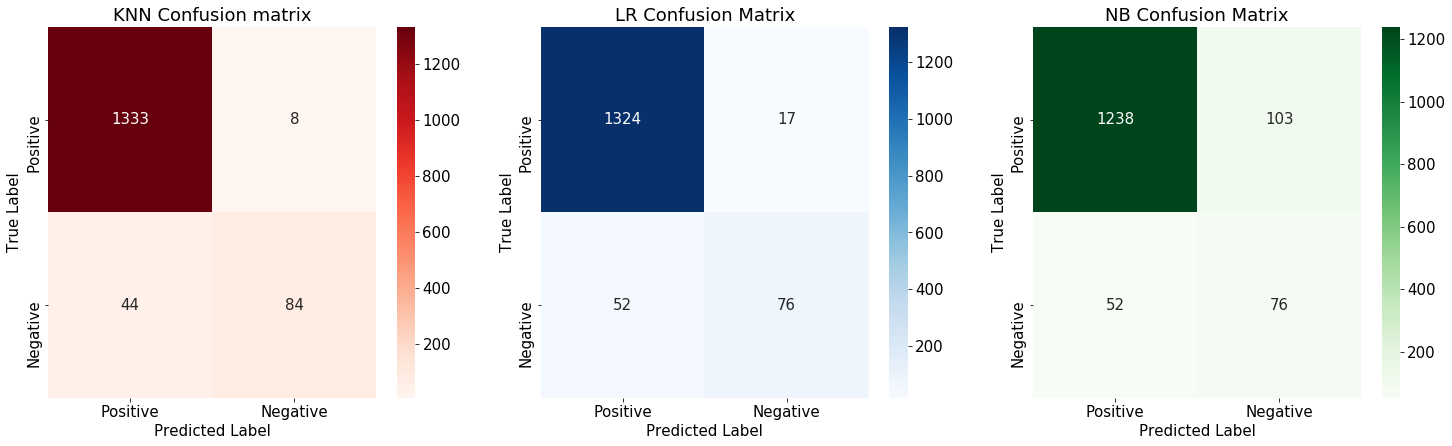

In [265]:
from sklearn.metrics import confusion_matrix
cm_knn = confusion_matrix(y_test, knn_predicted)
cm_lr = confusion_matrix(y_test, lr_predicted)
cm_nb = confusion_matrix(y_test, nb_predicted)

class_label = ["Positive", "Negative"]
plt.figure(figsize=(25,15))
plt.rcParams.update({'font.size': 15})
plt.subplot(2,3,1)
df_cm = pd.DataFrame(cm_knn, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d", cmap="Reds")
plt.title("KNN Confusion matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.subplot(2,3,2)
df_cm = pd.DataFrame(cm_lr, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d", cmap="Blues")
plt.title("LR Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.subplot(2,3,3)
df_cm = pd.DataFrame(cm_nb, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d",cmap="Greens")
plt.title("NB Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

#### Inference:
- Truepositive is highest for KNN model. Hence a better performer than other two. 
- Falsenegative is highest for Naive Bayes. Hence a poorer performer than other two

#### 7.Give your reasoning on which is the best model in this case and why it performs better? (5 points)

In [266]:
from sklearn import model_selection
models = []
models.append(('knn', knn))
models.append(('lr', lr))
models.append(('nb', nb))

knn: 0.965271 (0.005128)
lr: 0.953218 (0.003844)
nb: 0.892135 (0.005192)


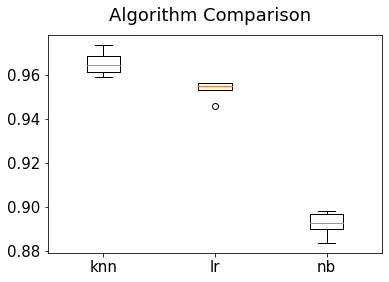

In [267]:
# evaluate each model in turn
from scipy.stats import zscore
results = []
names = []
scoring = 'accuracy'
X_z = X.apply(zscore) 
for name, model in models:
	kfold = model_selection.KFold(n_splits=5,random_state=None)
	cv_results = model_selection.cross_val_score(model, X_z, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, np.mean(cv_results), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [268]:
results # accuracy result for all 5 splits of data

[array([0.96833504, 0.96424923, 0.96118488, 0.95914198, 0.97344229]),
 array([0.95505618, 0.94586313, 0.95301328, 0.95607763, 0.95607763]),
 array([0.88355465, 0.89785495, 0.8968335 , 0.8927477 , 0.88968335])]

#### Conclusion
<B>KNN is the best model with around 97% accuracy in determining if a customer will buy the personal loan or not. Also, the recall value is 66% is much better than logistic regression and Naive Bayes algorithms. Also, the area under the curve is fairly good.</B>

### Thank You